# Crawled Data from Twitter :
Using hashtag of " I am diagnosed with depression", "I am fighting depression" and "I suffer from depression" for depression and "#happyme", "#lifeisgood" and "#lovemylife"
### Load Data

In [1]:
from data import TwitterP
import numpy as np
from tqdm import trange

In [2]:
trainT, validationT, testT = TwitterP.load_data()

Data has apparently already been downloaded and unpacked.


In [3]:
print(f"{len(trainT)} training samples")
print(f"{len(validationT)} validation samples")
print(f"{len(testT)} testing samples")

3071 training samples
1024 validation samples
1365 testing samples


In [4]:
trainT.Positive.value_counts() 
# 1618 depressed users so approximativaly 16000 depression status
# 1453 not depressed so approximativaly 14000 not depression status

1    1618
0    1453
Name: Positive, dtype: int64

In [3]:
df=trainT.append(validationT)
df=df.append(testT)

In [7]:
len(df)

5460

In [7]:
df.Positive.value_counts() 
# 2867 depressed users so approximativaly 28000 depression status
# 2593 not depressed so approximativaly 25000 not depression status

1    2867
0    2593
Name: Positive, dtype: int64

In [4]:
Negative_tweets=[]
Positive_tweets=[]
n_private=0

In [5]:
for i in trange(1,len(df)):
    timeline = TwitterP.get_username_profile(df['username'].iloc[i])
    if df["Positive"][i]==1:
        if (timeline.empty):
            n_private+=1
        else:
            Positive_tweets=np.append(Positive_tweets,timeline.tweet)
    if df["Negative"][i]==1:
        if (timeline.empty):
            n_private+=1
        else:
            Negative_tweets=np.append(Negative_tweets,timeline.tweet)

100%|██████████| 5459/5459 [01:20<00:00, 67.50it/s]


In [10]:
n_private

997

In [11]:
len(Positive_tweets), len(Negative_tweets)

(223014, 187360)

In [12]:
PL = [1] * len(Positive_tweets) 
NL = [0] * len(Negative_tweets) 

In [13]:
x=np.append(Positive_tweets,Negative_tweets)
y=np.append(PL,NL)

In [11]:
x=np.append(Positive_tweets[0:7000],Negative_tweets[0:10000])
y=np.append(PL[0:7000],NL[0:10000])

### Wordcloud:

In [6]:
from models.Tweets_classifier import TweetsPreprocessing
clean = TweetsPreprocessing.clean_tweets(Positive_tweets,tokenized=True) 

/opt/conda/lib/python3.7/site-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading english - 1grams ...


/opt/conda/lib/python3.7/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in
100%|██████████| 223014/223014 [05:15<00:00, 707.49it/s]


In [7]:
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
list_words = [val for sublist in clean for val in sublist]
L=Counter(list_words)


In [9]:
print(L.most_common()[0:250])

[('not', 47264), ('url', 37806), ('pic', 29187), ('get', 20247), ('go', 16534), ('can', 15900), ('like', 15095), ('face_with_tears_of_joy', 13767), ('if', 13051), ('love', 11378), ('people', 11307), ('time', 11250), ('will', 10928), ('no', 10518), ('know', 10379), ('don', 10311), ('make', 10083), ('one', 9652), ('bad_word', 9642), ('want', 9254), ('think', 8944), ('elongate', 8617), ('say', 8464), ('need', 8291), ('see', 7864), ('thank', 7841), ('more', 7503), ('red_heart', 7379), ('good', 7273), ('work', 6862), ('feel', 6721), ('would', 6678), ('re', 6644), ('take', 6494), ('loudly_crying_face', 6350), ('really', 6038), ('look', 5873), ('day', 5862), ('much', 5689), ('rolling_on_the_floor_laughing', 5634), ('come', 5605), ('why', 5140), ('still', 5100), ('right', 4998), ('eye', 4954), ('try', 4895), ('back', 4892), ('help', 4784), ('oh', 4520), ('well', 4437), ('give', 4412), ('lol', 4353), ('please', 4334), ('us', 4279), ('live', 4210), ('today', 4070), ('never', 4064), ('life', 4036

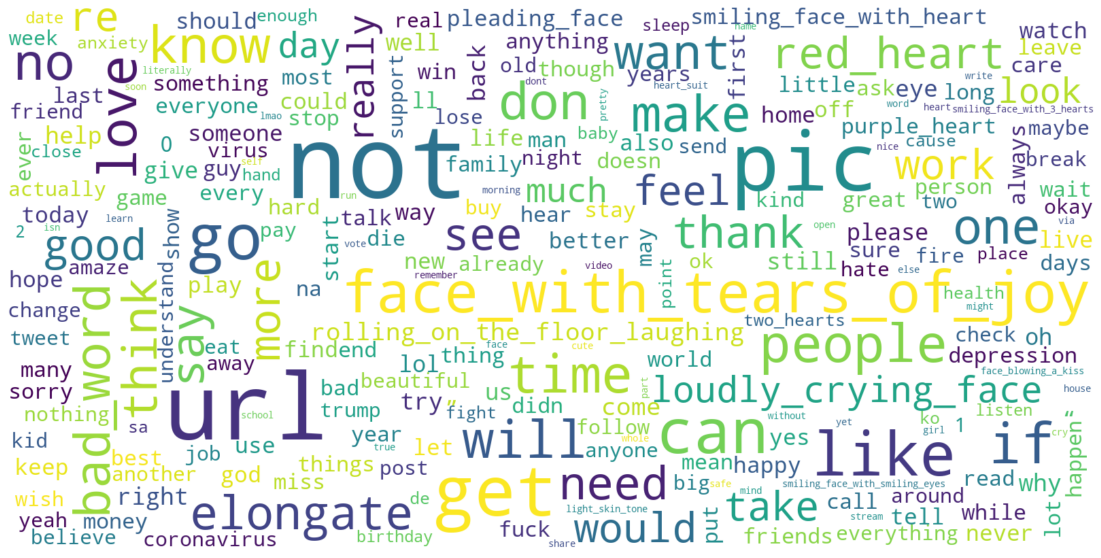

In [10]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(width=1600, height=800,max_font_size=150, max_words=250, background_color="white").generate_from_frequencies(L)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("word_Positive.png")

In [11]:
clean_N = TweetsPreprocessing.clean_tweets(Negative_tweets,tokenized=True) 

100%|██████████| 187360/187360 [05:36<00:00, 556.75it/s]


In [12]:
list_words = [val for sublist in clean_N for val in sublist]
L=Counter(list_words)

In [13]:
print(L.most_common()[0:250])

[('url', 92187), ('pic', 39531), ('not', 19401), ('love', 14505), ('de', 11961), ('get', 10929), ('red_heart', 10752), ('face_with_tears_of_joy', 10540), ('time', 9161), ('go', 8347), ('no', 8266), ('can', 8009), ('day', 7572), ('que', 7016), ('new', 6722), ('la', 6638), ('like', 6469), ('en', 6319), ('rolling_on_the_floor_laughing', 6316), ('elongate', 6245), ('make', 6227), ('happy', 6140), ('eye', 6124), ('good', 6010), ('one', 5999), ('life', 5987), ('thank', 5677), ('will', 5514), ('if', 5186), ('today', 5103), ('see', 4799), ('smiling_face_with_heart', 4644), ('lovemylife', 4634), ('more', 4545), ('know', 4539), ('work', 4538), ('don', 4321), ('lifeisgood', 4057), ('great', 4051), ('come', 4035), ('people', 4035), ('take', 4015), ('“', 3997), ('•', 3969), ('look', 3901), ('el', 3859), ('need', 3839), ('want', 3805), ('fire', 3799), ('think', 3705), ('”', 3631), ('live', 3516), ('home', 3504), ('say', 3360), ('beautiful', 3338), ('check', 3319), ('us', 3265), ('2', 3256), ('0', 31

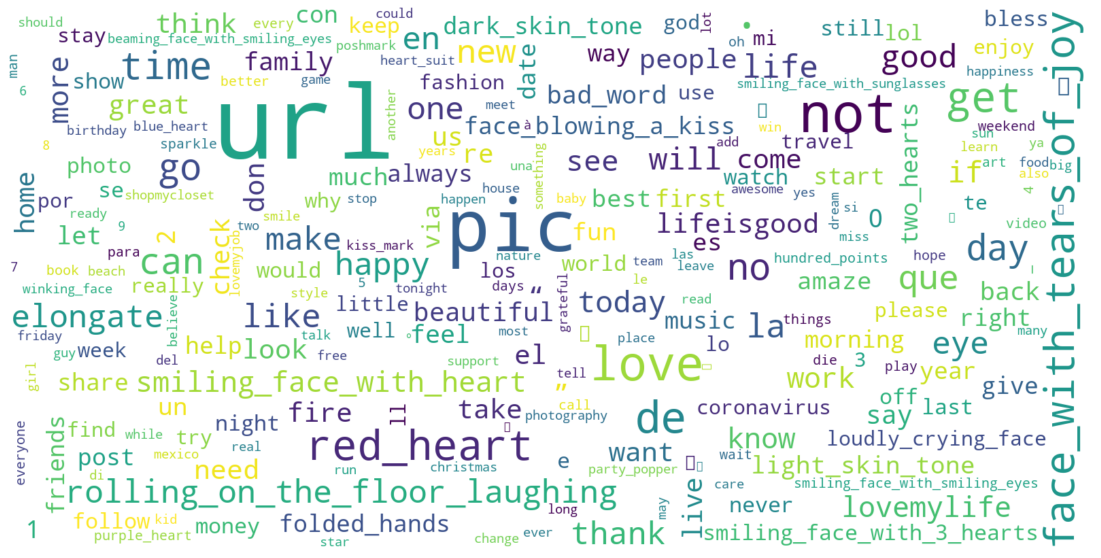

In [14]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(width=1600, height=800,max_font_size=150, max_words=250, background_color="white").generate_from_frequencies(L)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("word_Negative.png")

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
MAX_NUM_WORDS = 70000 # how many unique words in the training text to be tokenised

In [18]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(clean)
sequences = tokenizer.texts_to_sequences(clean)
word_index = tokenizer.word_index

print("{} distinct words in original Positive text".format(len(word_index)))

143043 distinct words in original text


190

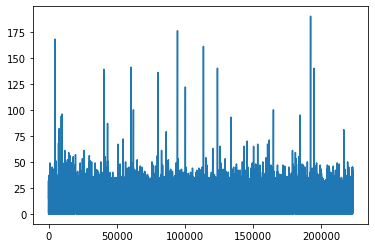

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
seq_lengths = [len(x) for x in sequences]
plt.plot(seq_lengths)
max(seq_lengths)


In [20]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(clean_N)
sequences = tokenizer.texts_to_sequences(clean_N)
word_index = tokenizer.word_index

print("{} distinct words in original Negattive text".format(len(word_index)))

262737 distinct words in original text


202

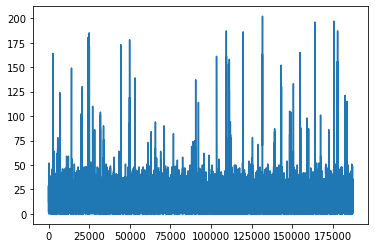

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
seq_lengths = [len(x) for x in sequences]
plt.plot(seq_lengths)
max(seq_lengths)


In [9]:
from sklearn.model_selection import train_test_split
# not preprocessed data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2020,shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2020,shuffle=True)


In [ ]:
from sklearn.model_selection import train_test_split
# preprocessed data 
x=np.append(clean,clean_N)
y=np.append(PL,NL)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2020,shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2020,shuffle=True)


In [24]:
len(x_train),len(x_test), len(x_val)

(11475, 4250, 1275)

In [25]:
len(y_train[y_train==1]),len(y_train[y_train==0])

(4712, 6763)

In [26]:
len(y_test[y_test==1]),len(y_test[y_test==0])

(1760, 2490)

In [27]:
len(y_val[y_val==1]),len(y_val[y_val==0])

(528, 747)

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
MAX_NUM_WORDS = 70000 # how many unique words in the training text to be tokenised

In [15]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
word_index = tokenizer.word_index

print("{} distinct words in original Positive text".format(len(word_index)))

41086 distinct words in original Positive text


73

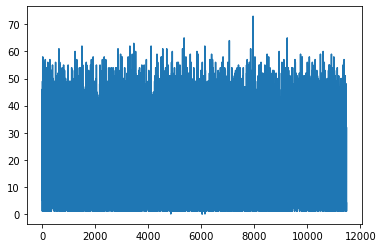

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
seq_lengths = [len(x) for x in sequences]
plt.plot(seq_lengths)
max(seq_lengths)


### Train Model 
#### Not preprocessed data:

In [11]:
from models.Tweets_classifier import LSTM

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading english - 1grams ...


/opt/conda/lib/python3.7/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
data finitshed prepraring
data finitshed prepraring
data finitshed prepraring
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 14000 samples, validate on 1400 samples


Epoch 1/20
 - 489s - loss: 0.5730 - accuracy: 0.7024 - val_loss: 0.5633 - val_accuracy: 0.7221

Epoch 00001: val_accuracy improved from -inf to 0.72214, saving model to LSTM.Crawled.01-0.56.h5

Epoch 2/20
 - 493s - loss: 0.4285 - accuracy: 0.8066 - val_loss: 0.7096 - val_accuracy: 0.6436

Epoch 00002: val_accuracy did not improve from 0.72214
Epoch 3/20
 - 495s - loss: 0.2278 - accuracy: 0.9133 - val_loss: 1.2957 - val_accuracy: 0.5736

Epoch 00003: val_accuracy did not improve from 0.72214
Epoch 4/20
 - 489s - loss: 0.1225 - accuracy: 0.9560 - val_loss: 1.5655 - val_accuracy: 0.5707

Epoch 00004: val_accuracy did not improve from 0.72214
Epoch 5/20
 - 497s - loss: 0.0820 - accuracy: 0.

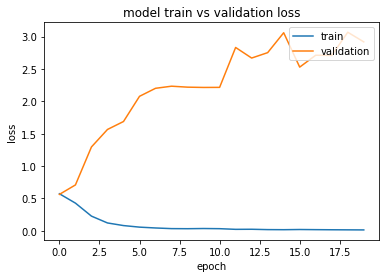

Train accuracy: 0.9956428408622742
Test accuracy: 0.5605714321136475
CPU times: user 12h 23min 27s, sys: 9h 36min 40s, total: 22h 8s
Wall time: 2h 49min 49s


In [30]:
%%time
CM, CR= LSTM.train_LSTM(x_train=x_train_s,y_train=y_train_s,x_val=x_val_s,y_val=y_val_s,x_test=x_test_s,y_test=y_test_s,batch_size=100)

In [31]:
CM

array([[1087,  810],
       [ 728,  875]])

In [32]:
CR

'               precision    recall  f1-score   support\n\n    Depressed       0.60      0.57      0.59      1897\nNot depressed       0.52      0.55      0.53      1603\n\n     accuracy                           0.56      3500\n    macro avg       0.56      0.56      0.56      3500\n weighted avg       0.56      0.56      0.56      3500\n'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
data finitshed prepraring
data finitshed prepraring
data finitshed prepraring
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 14000 samples, validate on 1400 samples


Epoch 1/20
 - 522s - loss: 0.5734 - accuracy: 0.7042 - val_loss: 0.7076 - val_accuracy: 0.5543

Epoch 00001: val_accuracy improved from -inf to 0.55429, saving model to LSTM.Crawled.01-0.71.h5

Epoch 2/20
 - 507s - loss: 0.4200 - accuracy: 0.8134 - val_loss: 0.8708 - val_accuracy: 0.5550

Epoch 00002: val_accuracy improved from 0.55429 to 0.55500, saving model to LSTM.Crawled.02-0.87.h5
Epoch 3/20
 - 502s - loss: 0.2122 - accuracy: 0.9223 - val_loss: 1.2863 - val_accuracy: 0.5429

Epoch 00003: val_accuracy did not improve from 0.55500
Epoch 4/20
 - 497s - loss: 0.1125 - accuracy: 0.9612 - val_loss: 1.5523 - val_accuracy: 0.5264

Epoch 00004: val_accuracy did not improve from 0.55500
Epo

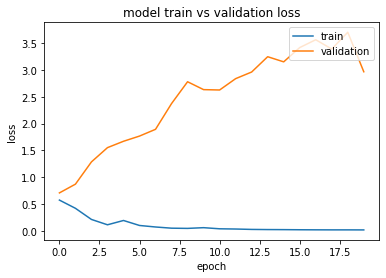

Train accuracy: 0.9953571557998657
Test accuracy: 0.5522857308387756
CPU times: user 12h 47min 15s, sys: 9h 14min 38s, total: 22h 1min 54s
Wall time: 2h 50min 26s


In [13]:
%%time

# changed the optimizer 
CM, CR= LSTM.train_LSTM(x_train=x_train_s,y_train=y_train_s,x_val=x_val_s,y_val=y_val_s,x_test=x_test_s,y_test=y_test_s,batch_size=100)

In [14]:
print(CM)

array([[ 772,  786],
       [ 781, 1161]])

In [15]:
print(CR)

               precision    recall  f1-score   support

    Depressed       0.50      0.50      0.50      1558
Not depressed       0.60      0.60      0.60      1942

     accuracy                           0.55      3500
    macro avg       0.55      0.55      0.55      3500
 weighted avg       0.55      0.55      0.55      3500



## Tying Unbalanced Data on purpose 

In [10]:
print("Train positive ",len(y_train[y_train==1]),"Train Negative",len(y_train[y_train==0]))
print("Validation positive ",len(y_val[y_val==1]),"Validation Negative",len(y_val[y_val==0]))
print("Test positive ",len(y_test[y_test==1]),"Test Negative",len(y_test[y_test==0]))


Train positive  4712 Train Negative 6763
Validation positive  528 Validation Negative 747
Test positive  1760 Test Negative 2490


In [11]:
from models.Tweets_classifier import LSTM

/opt/conda/lib/python3.7/site-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading english - 1grams ...


/opt/conda/lib/python3.7/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


data finitshed prepraring
data finitshed prepraring
data finitshed prepraring
Epoch 1/10

Epoch 00001: val_accuracy improved from -inf to 0.63216, saving model to LSTM.Crawled.01-0.67.h5
96/96 - 66s - loss: 0.5433 - accuracy: 0.6810 - val_loss: 0.6692 - val_accuracy: 0.6322
Epoch 2/10

Epoch 00002: val_accuracy did not improve from 0.63216
96/96 - 65s - loss: 0.3670 - accuracy: 0.8265 - val_loss: 0.9432 - val_accuracy: 0.5835
Epoch 3/10

Epoch 00003: val_accuracy did not improve from 0.63216
96/96 - 66s - loss: 0.1866 - accuracy: 0.9292 - val_loss: 1.2406 - val_accuracy: 0.5192
Epoch 4/10

Epoch 00004: val_accuracy did not improve from 0.63216
96/96 - 64s - loss: 0.0952 - accuracy: 0.9679 - val_loss: 1.9723 - val_accuracy: 0.4784
Epoch 5/10

Epoch 00005: val_accuracy did not improve from 0.63216
96/96 - 65s - loss: 0.0594 - accuracy: 0.9810 - val_loss: 2.0585 - val_accuracy: 0.5051
Epoch 6/10

Epoch 00006: val_accuracy did not improve from 0.63216
96/96 - 65s - loss: 0.0479 - accuracy:

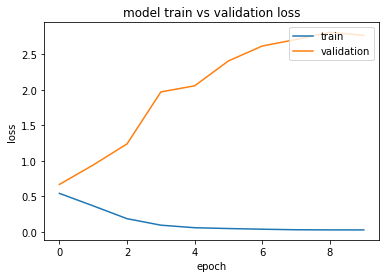

Train accuracy: 0.9967756271362305
Test accuracy: 0.5781176686286926
CPU times: user 1h 3min 31s, sys: 8min 38s, total: 1h 12min 9s
Wall time: 11min 29s


In [20]:
%%time
CM, CR= LSTM.train_LSTM(x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,x_test=x_test,y_test=y_test,batch_size=100) # LR=0.001

In [21]:
print(CM)

[[1468 1022]
 [ 771  989]]


In [22]:
print(CR)

               precision    recall  f1-score   support

    Depressed       0.66      0.59      0.62      2490
Not depressed       0.49      0.56      0.52      1760

     accuracy                           0.58      4250
    macro avg       0.57      0.58      0.57      4250
 weighted avg       0.59      0.58      0.58      4250



data finitshed prepraring
data finitshed prepraring
data finitshed prepraring
Epoch 1/10

Epoch 00001: val_accuracy improved from -inf to 0.58588, saving model to LSTM.Crawled.01-0.67.h5
90/90 - 62s - loss: 0.6835 - accuracy: 0.5843 - val_loss: 0.6687 - val_accuracy: 0.5859
Epoch 2/10

Epoch 00002: val_accuracy improved from 0.58588 to 0.63451, saving model to LSTM.Crawled.02-0.62.h5
90/90 - 62s - loss: 0.5827 - accuracy: 0.6344 - val_loss: 0.6171 - val_accuracy: 0.6345
Epoch 3/10

Epoch 00003: val_accuracy improved from 0.63451 to 0.66510, saving model to LSTM.Crawled.03-0.64.h5
90/90 - 62s - loss: 0.5083 - accuracy: 0.7211 - val_loss: 0.6352 - val_accuracy: 0.6651
Epoch 4/10

Epoch 00004: val_accuracy did not improve from 0.66510
90/90 - 61s - loss: 0.4660 - accuracy: 0.7526 - val_loss: 0.6552 - val_accuracy: 0.6549
Epoch 5/10

Epoch 00005: val_accuracy did not improve from 0.66510
90/90 - 61s - loss: 0.4202 - accuracy: 0.7902 - val_loss: 0.7427 - val_accuracy: 0.6275
Epoch 6/10

Epo

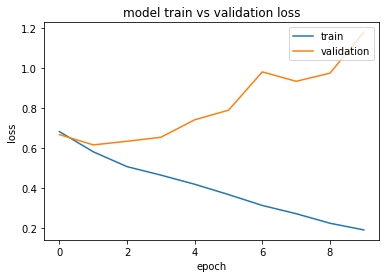

Train accuracy: 0.9694989323616028
Test accuracy: 0.6124705672264099
CPU times: user 1h 1min 31s, sys: 7min 34s, total: 1h 9min 5s
Wall time: 10min 54s


In [23]:
%%time
CM, CR= LSTM.train_LSTM(x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,x_test=x_test,y_test=y_test,batch_size=128,lr=0.0001) # LR=0.001

In [24]:
print(CM)

[[1885  605]
 [1042  718]]


In [25]:
print(CR)

               precision    recall  f1-score   support

    Depressed       0.64      0.76      0.70      2490
Not depressed       0.54      0.41      0.47      1760

     accuracy                           0.61      4250
    macro avg       0.59      0.58      0.58      4250
 weighted avg       0.60      0.61      0.60      4250



data finitshed prepraring
data finitshed prepraring
data finitshed prepraring
Epoch 1/10

Epoch 00001: val_accuracy improved from -inf to 0.65647, saving model to LSTM.Crawled.01-0.63.h5
90/90 - 66s - loss: 0.6159 - accuracy: 0.6238 - val_loss: 0.6265 - val_accuracy: 0.6565
Epoch 2/10

Epoch 00002: val_accuracy did not improve from 0.65647
90/90 - 63s - loss: 0.4766 - accuracy: 0.7419 - val_loss: 0.6728 - val_accuracy: 0.6525
Epoch 3/10

Epoch 00003: val_accuracy did not improve from 0.65647
90/90 - 63s - loss: 0.3831 - accuracy: 0.8160 - val_loss: 0.8078 - val_accuracy: 0.6071
Epoch 4/10

Epoch 00004: val_accuracy did not improve from 0.65647
90/90 - 63s - loss: 0.2701 - accuracy: 0.8846 - val_loss: 0.9863 - val_accuracy: 0.5522
Epoch 5/10

Epoch 00005: val_accuracy did not improve from 0.65647
90/90 - 63s - loss: 0.1838 - accuracy: 0.9308 - val_loss: 1.1422 - val_accuracy: 0.5514
Epoch 6/10

Epoch 00006: val_accuracy did not improve from 0.65647
90/90 - 64s - loss: 0.1239 - accuracy:

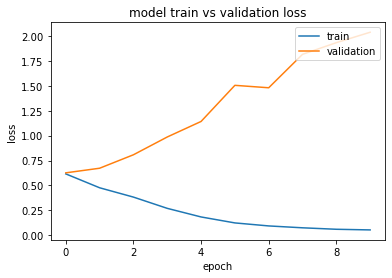

Train accuracy: 0.9933769106864929
Test accuracy: 0.5868235230445862
CPU times: user 1h 2min 8s, sys: 8min 32s, total: 1h 10min 41s
Wall time: 11min 13s


In [26]:
%%time
CM, CR= LSTM.train_LSTM(x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,x_test=x_test,y_test=y_test,batch_size=128,lr=0.0003)

In [27]:
print(CM)

[[1486 1004]
 [ 752 1008]]


In [28]:
print(CR)

               precision    recall  f1-score   support

    Depressed       0.66      0.60      0.63      2490
Not depressed       0.50      0.57      0.53      1760

     accuracy                           0.59      4250
    macro avg       0.58      0.58      0.58      4250
 weighted avg       0.60      0.59      0.59      4250



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
data finished prepraring
data finished prepraring
data finished prepraring
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 11475 samples, validate on 1275 samples
Epoch 1/10
11475/11475 - 89s - loss: 0.6937 - acc: 0.4730 - val_loss: 0.6930 - val_acc: 0.5341
Epoch 2/10
11475/11475 - 86s - loss: 0.6923 - acc: 0.5457 - val_loss: 0.6922 - val_acc: 0.5851
Epoch 3/10
11475/11475 - 86s - loss: 0.6910 - acc: 0.5875 - val_loss: 0.6914 - val_acc: 0.5875
Epoch 4/10
11475/11475 - 86s - loss: 0.6893 - acc: 0.5971 - val_loss: 0.6904 - val_acc: 0.5867
Epoch 5/10
11475/11475 - 86s - loss: 0.6877 - acc: 0.6035 - val_loss: 0.6893 - val_acc: 0.5859
Epoch 6/10
11475/11475 - 87s - loss: 0.6853 - acc: 0.5986 - val_loss: 0.6880 - val_acc: 0.5859
Epoch 7/10
11

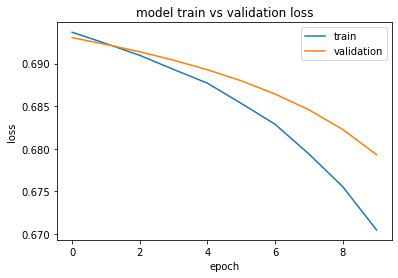

Train accuracy: 0.58936816
Test accuracy: 0.58588237
CPU times: user 1h 46s, sys: 1h 1min 32s, total: 2h 2min 19s
Wall time: 15min 32s


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
%%time
CM, CR= LSTM.train_LSTM(x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,x_test=x_test,y_test=y_test,batch_size=128,lr=0.00001)

In [13]:
print(CM)

[[2490    0]
 [1760    0]]


In [14]:
print(CR)

               precision    recall  f1-score   support

    Depressed       0.59      1.00      0.74      2490
Not depressed       0.00      0.00      0.00      1760

     accuracy                           0.59      4250
    macro avg       0.29      0.50      0.37      4250
 weighted avg       0.34      0.59      0.43      4250

